<a href="https://colab.research.google.com/github/YYL1129/Linear_Regression/blob/main/Linear_Regression_in_Python_Ecommerce_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/EcommerceCustomers.csv")

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


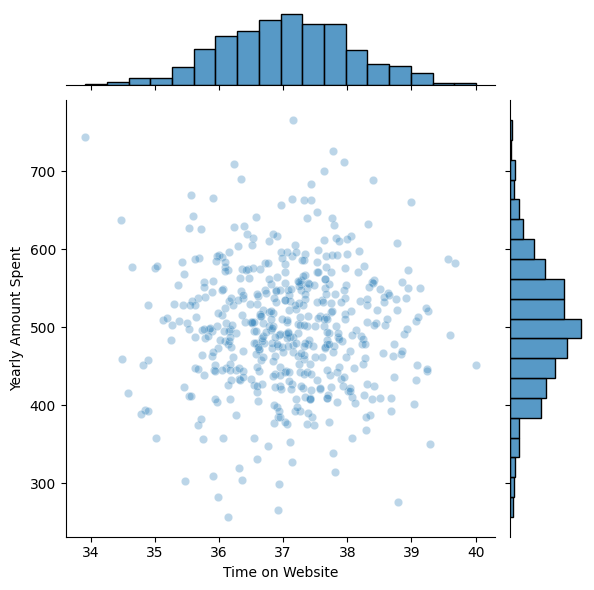

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,alpha=0.3)

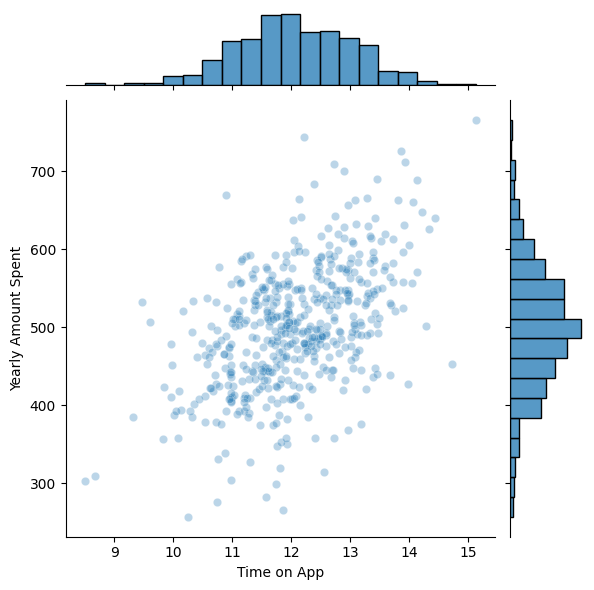

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,alpha=0.3)

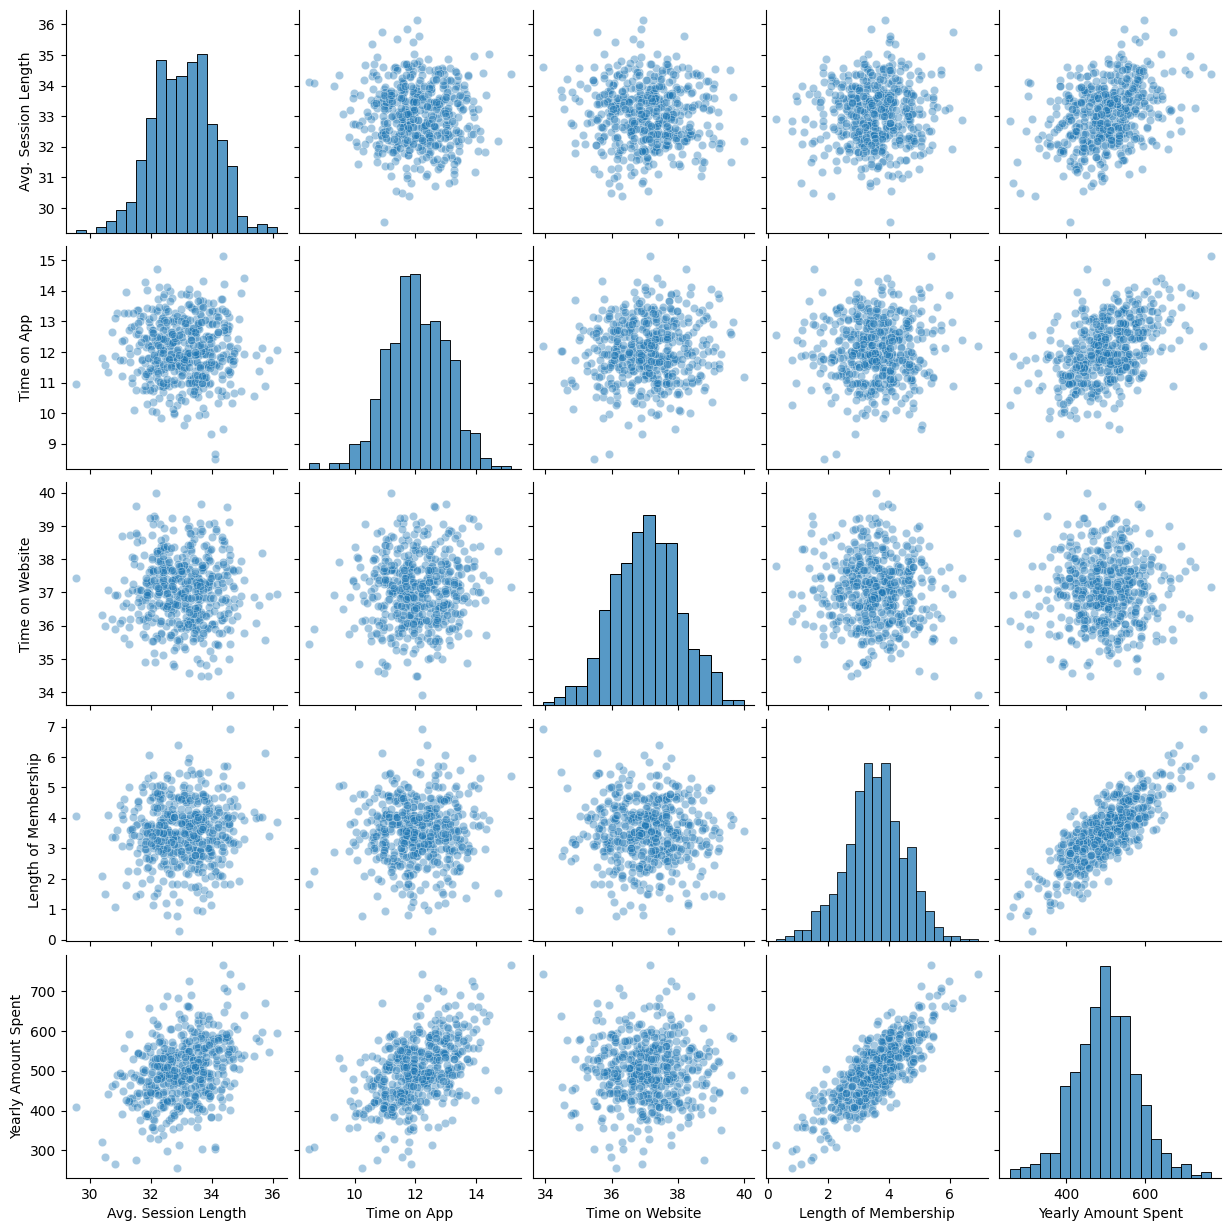

In [ ]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4})

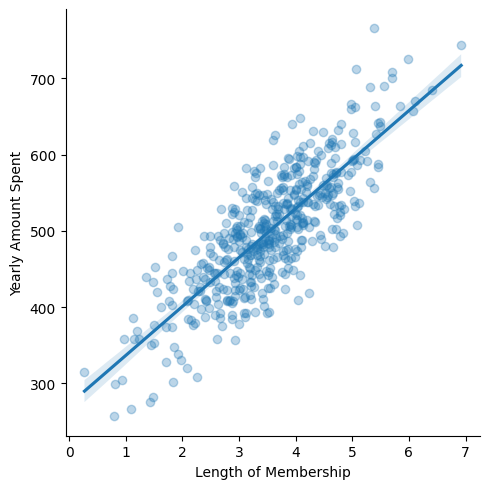

In [ ]:
sns.lmplot(x = "Length of Membership",
           y = "Yearly Amount Spent",
           data = df,
           scatter_kws={"alpha":0.3})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 x = df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
 y = df["Yearly Amount Spent"]

In [ ]:
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
# training the model

from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()

In [ ]:
ln.fit(x_Train,y_Train)

LinearRegression()

In [ ]:
ln.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [ ]:
df = pd.DataFrame(ln.coef_,x.columns,columns=["Coef"])
print(df)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [ ]:
# Prediction

prediction = ln.predict(x_Test)
prediction

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of our LM Model')

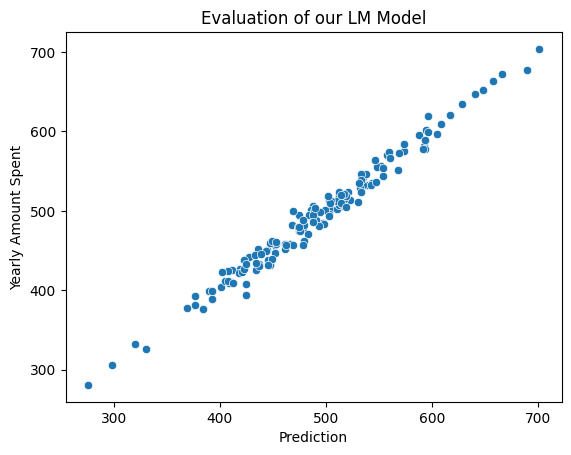

In [ ]:
sns.scatterplot(x=y_Test,y=prediction)
plt.xlabel("Prediction")
plt.ylabel("Yearly Amount Spent")
plt.title("Evaluation of our LM Model")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_Test,prediction))
print("Mean Squared Error:",mean_squared_error(y_Test,prediction))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_Test,prediction)))


Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155


In [ ]:
# Residule

residule = y_Test - prediction

In [ ]:
residule

,Yearly Amount Spent
361,-2.636795
73,-7.800375
374,-8.463174
155,1.953775
104,-0.051825
...,...
266,10.327176
23,15.027984
222,-16.778237
261,-6.021734


<ipython-input-97-2e61a8691390>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residule, bins=20, kde=True)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

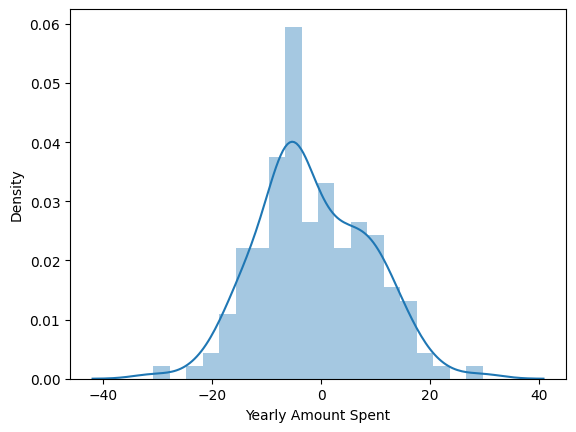

In [ ]:
sns.distplot(residule, bins=20, kde=True)

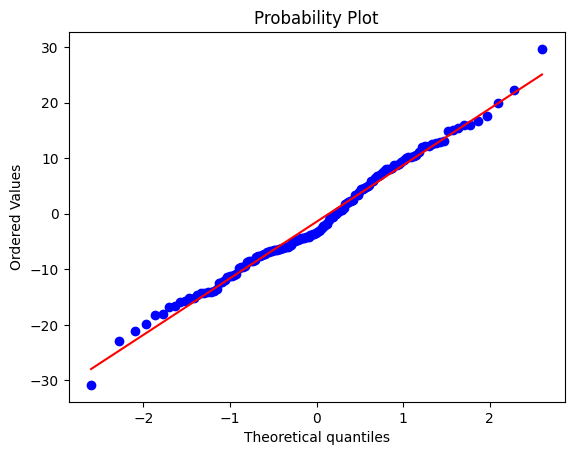

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residule, dist="norm", plot=pylab)
pylab.show()